<a href="https://colab.research.google.com/github/Sudo343/Foundations-of-ML-MA722/blob/main/1_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Apriori Algorithm for Market basket analysis.**

install, then import concerned libraries.
" arules "

In [21]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Load the dataset

In [5]:
mydata = read.csv("/content/Example1.csv")

Let's examine the dataset

In [6]:
View(mydata)

Bread,Cheese,Eggs,Juice,Milk,Yogurt
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Yes,Yes,Yes,Yes,No,No
Yes,Yes,No,Yes,No,No
Yes,No,No,No,Yes,Yes
Yes,No,No,No,Yes,No
No,Yes,No,Yes,Yes,No


### Apply apriori on the given data

In [7]:
rules = apriori(mydata)

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [12 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [495 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


examine the " rules " variable we just created

In [8]:
rules

set of 495 rules 

so we have 495 rules from the dataset.
lets use inspect on rules

In [9]:
inspect(rules)

      lhs             rhs          support confidence coverage     lift count
[1]   {}           => {Bread=Yes}      0.8        0.8      1.0 1.000000     4
[2]   {}           => {Yogurt=No}      0.8        0.8      1.0 1.000000     4
[3]   {}           => {Eggs=No}        0.8        0.8      1.0 1.000000     4
[4]   {Eggs=Yes}   => {Milk=No}        0.2        1.0      0.2 2.500000     1
[5]   {Eggs=Yes}   => {Cheese=Yes}     0.2        1.0      0.2 1.666667     1
[6]   {Eggs=Yes}   => {Juice=Yes}      0.2        1.0      0.2 1.666667     1
[7]   {Eggs=Yes}   => {Bread=Yes}      0.2        1.0      0.2 1.250000     1
[8]   {Eggs=Yes}   => {Yogurt=No}      0.2        1.0      0.2 1.250000     1
[9]   {Yogurt=Yes} => {Cheese=No}      0.2        1.0      0.2 2.500000     1
[10]  {Yogurt=Yes} => {Juice=No}       0.2        1.0      0.2 2.500000     1
[11]  {Yogurt=Yes} => {Milk=Yes}       0.2        1.0      0.2 1.666667     1
[12]  {Yogurt=Yes} => {Bread=Yes}      0.2        1.0      0.2 1

### lets determine rules with constraints of support, confidence.

itemsets and maximum 3 itemsets with a support of 0.5

In [10]:
rules = apriori(mydata, 
                parameter=list(minlen=2,
                               maxlen=3, 
                               support=0.5))

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(mydata, parameter = list(minlen = 2, maxlen = 3, support = 0.5)):
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.00s].
writing ... [8 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


examine the rules now

In [11]:
rules

set of 8 rules 

so we brought it down to 8 rules.
lets inspect them...

In [12]:
inspect(rules)

    lhs                       rhs          support confidence coverage lift    
[1] {Cheese=Yes}           => {Juice=Yes}  0.6     1          0.6      1.666667
[2] {Juice=Yes}            => {Cheese=Yes} 0.6     1          0.6      1.666667
[3] {Cheese=Yes}           => {Yogurt=No}  0.6     1          0.6      1.250000
[4] {Juice=Yes}            => {Yogurt=No}  0.6     1          0.6      1.250000
[5] {Milk=Yes}             => {Eggs=No}    0.6     1          0.6      1.250000
[6] {Cheese=Yes,Juice=Yes} => {Yogurt=No}  0.6     1          0.6      1.250000
[7] {Cheese=Yes,Yogurt=No} => {Juice=Yes}  0.6     1          0.6      1.666667
[8] {Juice=Yes,Yogurt=No}  => {Cheese=Yes} 0.6     1          0.6      1.666667
    count
[1] 3    
[2] 3    
[3] 3    
[4] 3    
[5] 3    
[6] 3    
[7] 3    
[8] 3    


### now Call apriori algorithm with default values with minimum 2
itemsets and maximum 3 itemsets with a support of 0.5 and confidence of 0.75

In [14]:
rules = apriori(mydata, 
                parameter=list(minlen=2,
                               maxlen=2,
                               support=0.5, 
                               confidence = 0.75))

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
      2  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [6 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2

Warning message in apriori(mydata, parameter = list(minlen = 2, maxlen = 2, support = 0.5, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.00s].
writing ... [14 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


check the new rules

In [15]:
inspect(rules)

     lhs             rhs          support confidence coverage lift     count
[1]  {Cheese=Yes} => {Juice=Yes}  0.6     1.00       0.6      1.666667 3    
[2]  {Juice=Yes}  => {Cheese=Yes} 0.6     1.00       0.6      1.666667 3    
[3]  {Cheese=Yes} => {Yogurt=No}  0.6     1.00       0.6      1.250000 3    
[4]  {Yogurt=No}  => {Cheese=Yes} 0.6     0.75       0.8      1.250000 3    
[5]  {Juice=Yes}  => {Yogurt=No}  0.6     1.00       0.6      1.250000 3    
[6]  {Yogurt=No}  => {Juice=Yes}  0.6     0.75       0.8      1.250000 3    
[7]  {Milk=Yes}   => {Eggs=No}    0.6     1.00       0.6      1.250000 3    
[8]  {Eggs=No}    => {Milk=Yes}   0.6     0.75       0.8      1.250000 3    
[9]  {Bread=Yes}  => {Yogurt=No}  0.6     0.75       0.8      0.937500 3    
[10] {Yogurt=No}  => {Bread=Yes}  0.6     0.75       0.8      0.937500 3    
[11] {Bread=Yes}  => {Eggs=No}    0.6     0.75       0.8      0.937500 3    
[12] {Eggs=No}    => {Bread=Yes}  0.6     0.75       0.8      0.937500 3    

use summary() on rules 

In [16]:
summary(rules)

set of 14 rules

rule length distribution (lhs + rhs):sizes
 2 
14 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support      confidence        coverage           lift            count  
 Min.   :0.6   Min.   :0.7500   Min.   :0.6000   Min.   :0.9375   Min.   :3  
 1st Qu.:0.6   1st Qu.:0.7500   1st Qu.:0.6000   1st Qu.:0.9375   1st Qu.:3  
 Median :0.6   Median :0.7500   Median :0.8000   Median :1.2500   Median :3  
 Mean   :0.6   Mean   :0.8393   Mean   :0.7286   Mean   :1.1756   Mean   :3  
 3rd Qu.:0.6   3rd Qu.:1.0000   3rd Qu.:0.8000   3rd Qu.:1.2500   3rd Qu.:3  
 Max.   :0.6   Max.   :1.0000   Max.   :0.8000   Max.   :1.6667   Max.   :3  

mining info:
   data ntransactions support confidence
 mydata             5     0.5       0.75

### Let's start visualizing the rules
for plotting, 
use library " arulesViz "

In [22]:
install.packages("arulesViz")
library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘TSP’, ‘crosstalk’, ‘promises’, ‘seriation’, ‘igraph’, ‘scatterplot3d’, ‘ggnetwork’, ‘DT’, ‘plotly’




To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



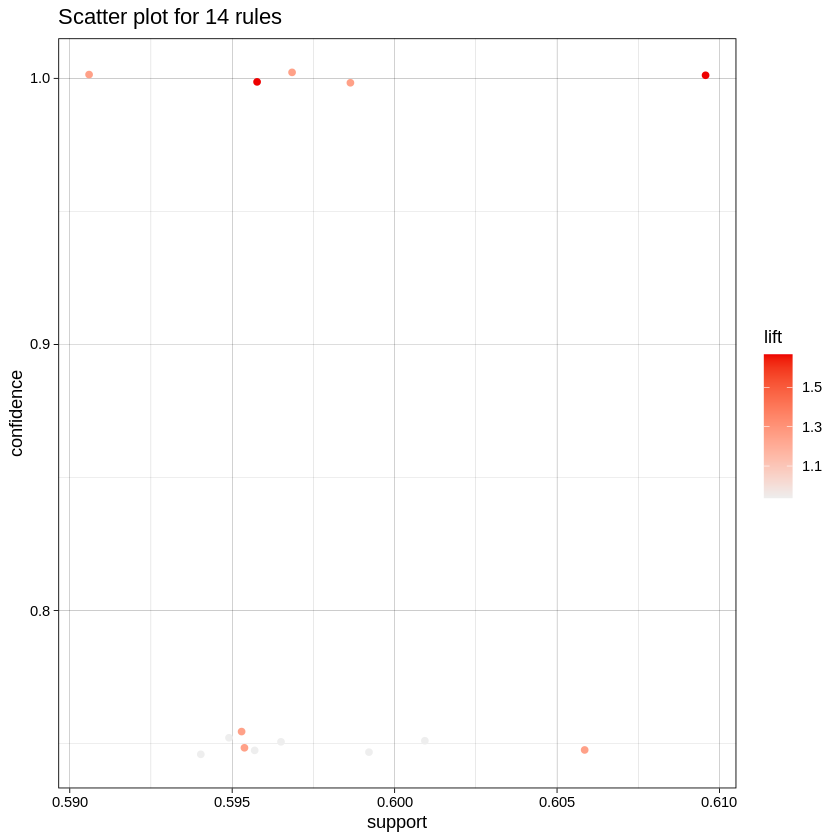

In [23]:
plot(rules)

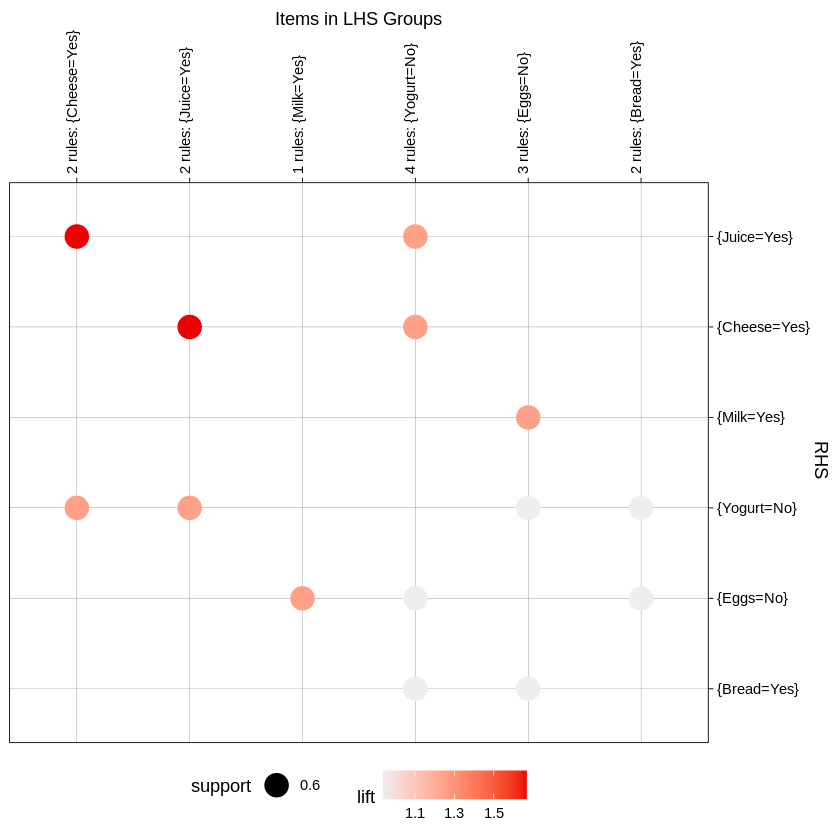

In [24]:
plot(rules,"grouped")

### Since we are only interested in " Yes " rules,
set the constraints in the function,
set lhs, rhs etc.

In [26]:
rules <- apriori(mydata,
                 parameter = list(minlen=2,
                                  maxlen=3,
                                  supp=.01,
                                  conf=.5),
                 appearance = list(rhs=c("Bread=Yes"),
                                   lhs=c("Eggs=Yes"),
                                   default="none"))

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[2 item(s)] done [0.00s].
set transactions ...[2 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [2 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [27]:
inspect(rules)

    lhs           rhs         support confidence coverage lift count
[1] {Eggs=Yes} => {Bread=Yes} 0.2     1          0.2      1.25 1    


In [28]:
rules

set of 1 rules 

from above we see that those who buy eggs are more likely to buy bread.
let's plot these rules.

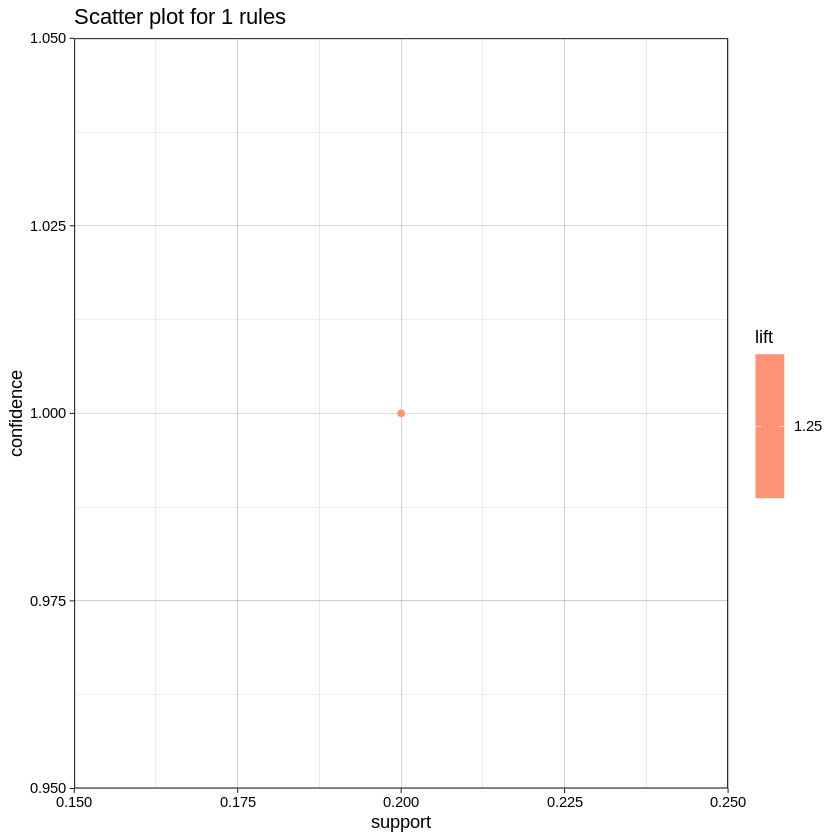

In [29]:
plot(rules)

In [31]:
plot(rules,"grouped")

ERROR: ignored

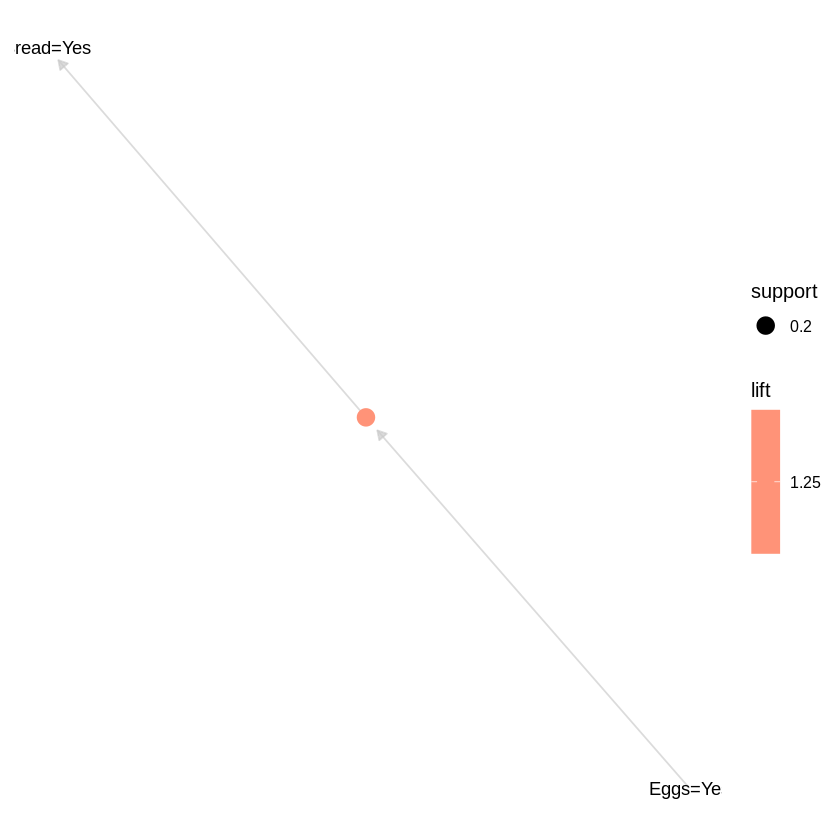

In [32]:
plot(rules,"graph")

### Let's explore for more rules

In [34]:
rules <- apriori(mydata,
                 parameter = list(minlen=2,
                                  maxlen=3,
                                  supp=.01, 
                                  conf=.5),
                 appearance=list(rhs=c("Bread=Yes"),
                                 lhs=c("Eggs=Yes", "Cheese=Yes"),
                                 default="none"))

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
      3  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[3 item(s)] done [0.00s].
set transactions ...[3 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [3 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [35]:
inspect(rules)

    lhs                      rhs         support confidence coverage lift     
[1] {Eggs=Yes}            => {Bread=Yes} 0.2     1.0000000  0.2      1.2500000
[2] {Cheese=Yes}          => {Bread=Yes} 0.4     0.6666667  0.6      0.8333333
[3] {Cheese=Yes,Eggs=Yes} => {Bread=Yes} 0.2     1.0000000  0.2      1.2500000
    count
[1] 1    
[2] 2    
[3] 1    


In [36]:
rules

set of 3 rules 

truncating the rules to get desired results

In [38]:
quality(rules)= round (quality(rules), digits =3)
inspect(rules)

    lhs                      rhs         support confidence coverage lift 
[1] {Eggs=Yes}            => {Bread=Yes} 0.2     1.000      0.2      1.250
[2] {Cheese=Yes}          => {Bread=Yes} 0.4     0.667      0.6      0.833
[3] {Cheese=Yes,Eggs=Yes} => {Bread=Yes} 0.2     1.000      0.2      1.250
    count
[1] 1    
[2] 2    
[3] 1    


if rules need to be sorted

In [39]:
rules.sorted = sort(rules, by ="confidence")
inspect(rules.sorted)

    lhs                      rhs         support confidence coverage lift 
[1] {Eggs=Yes}            => {Bread=Yes} 0.2     1.000      0.2      1.250
[2] {Cheese=Yes,Eggs=Yes} => {Bread=Yes} 0.2     1.000      0.2      1.250
[3] {Cheese=Yes}          => {Bread=Yes} 0.4     0.667      0.6      0.833
    count
[1] 1    
[2] 1    
[3] 2    


prune the rules, remove redundancy

In [40]:
redundant = is.redundant(rules,measure ="confidence")
which(redundant)
rules.pruned=rules[!redundant]
inspect(rules.pruned)

[1] 3

    lhs             rhs         support confidence coverage lift  count
[1] {Eggs=Yes}   => {Bread=Yes} 0.2     1.000      0.2      1.250 1    
[2] {Cheese=Yes} => {Bread=Yes} 0.4     0.667      0.6      0.833 2    


## Exercise on Cosmetics dataset
check dependencies,
load data,
get rules.

In [41]:
#library(arules)
cosmetic_data = read.csv("/content/Cosmetics.csv",
                          header = T,
                          colClasses = "factor")

In [44]:
cosmetic_data

Bag,Blush,Nail.Polish,Brushes,Concealer,Eyebrow.Pencils,Bronzer,Lip.liner,Mascara,Eye.shadow,Foundation,Lip.Gloss,Lipstick,Eyeliner
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
No,No,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No
No,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
No,No,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes
No,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No
No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes
No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
No,No,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,No
No,No,No,No,Yes,No,No,No,No,No,Yes,No,Yes,No


In [45]:
Rule_cosmetic = apriori( cosmetic_data,
                         parameter = list( support = 0.25,
                                           confidence = 0.7))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.25      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 250 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[28 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.01s].
writing ... [7483 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


for bakery

In [66]:
Rule_bakery = apriori( mydata,
                         parameter = list( support = 0.25,
                                           confidence = 0.7))

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5    0.25      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[12 item(s), 5 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [130 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [47]:
Rule_cosmetic

set of 7483 rules 

In [67]:
Rule_bakery

set of 130 rules 

get rules with lift < 1 in cosmetics data

In [55]:
Rule_cosmetic[ "lift" < 1]

set of 0 rules 

get rules with lift < 1 in bakery data

In [68]:
Rule_bakery[ "lift" < 1]

set of 0 rules 

lets examine the rules. 

in Cosmetic

In [63]:
Rule_cosmetic.sorted <- sort(Rule_cosmetic, by = "lift", decreasing = TRUE )
inspect( head(Rule_cosmetic.sorted) )

    lhs                     rhs              support confidence coverage     lift count
[1] {Bag=No,                                                                           
     Mascara=Yes}        => {Eye.shadow=Yes}   0.290  0.9090909    0.319 2.386065   290
[2] {Bag=No,                                                                           
     Eyebrow.Pencils=No,                                                               
     Mascara=Yes}        => {Eye.shadow=Yes}   0.270  0.9030100    0.299 2.370105   270
[3] {Mascara=Yes}        => {Eye.shadow=Yes}   0.321  0.8991597    0.357 2.359999   321
[4] {Eye.shadow=Yes}     => {Mascara=Yes}      0.321  0.8425197    0.381 2.359999   321
[5] {Eyebrow.Pencils=No,                                                               
     Eye.shadow=Yes}     => {Mascara=Yes}      0.298  0.8370787    0.356 2.344758   298
[6] {Eyebrow.Pencils=No,                                                               
     Mascara=Yes}        => {Eye

get rules with lift > 1 in bakery data and examine them

In [69]:
Rule_bakery.sorted <- sort(Rule_bakery, by = "lift", decreasing = TRUE )
inspect( head(Rule_bakery.sorted) )

    lhs                       rhs         support confidence coverage lift
[1] {Cheese=No}            => {Juice=No}  0.4     1          0.4      2.5 
[2] {Juice=No}             => {Cheese=No} 0.4     1          0.4      2.5 
[3] {Bread=Yes,Cheese=Yes} => {Milk=No}   0.4     1          0.4      2.5 
[4] {Bread=Yes,Juice=Yes}  => {Milk=No}   0.4     1          0.4      2.5 
[5] {Cheese=No,Milk=Yes}   => {Juice=No}  0.4     1          0.4      2.5 
[6] {Juice=No,Milk=Yes}    => {Cheese=No} 0.4     1          0.4      2.5 
    count
[1] 2    
[2] 2    
[3] 2    
[4] 2    
[5] 2    
[6] 2    


so in cosmetics rules, get rules with good support and then with high confidence,
 first get ones with high confidence

In [73]:
Rule_hiConf <- sort(Rule_cosmetic.sorted, by = "confidence", decreasing = TRUE )
inspect( head(Rule_hiConf) )

    lhs                     rhs              support confidence coverage     lift count
[1] {Bronzer=No,                                                                       
     Lip.liner=No,                                                                     
     Foundation=No}      => {Lip.Gloss=No}     0.253          1    0.253 1.960784   253
[2] {Bronzer=No,                                                                       
     Lip.liner=No,                                                                     
     Lip.Gloss=Yes}      => {Foundation=Yes}   0.295          1    0.295 1.865672   295
[3] {Brushes=No,                                                                       
     Bronzer=No,                                                                       
     Lip.liner=No,                                                                     
     Lip.Gloss=Yes}      => {Foundation=Yes}   0.275          1    0.275 1.865672   275
[4] {Bag=No,                    

In [71]:
Rule_hiConf

set of 7483 rules 

on removing redundancy 

In [75]:
redundant <- is.redundant(Rule_bakery, measure="confidence")
which(redundant)
Rule_bakery.pruned <- Rule_bakery[!redundant]
Rule_bakery

[1]  24  25  26  27  28  29  30  31  32  33  35  36  37  38  40  41  42  43
 [19]  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  63
 [37]  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
 [55]  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 [73] 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 [91] 118 119 120 121 122 123 124 125 126 127 128 129 130

set of 130 rules 

In [76]:
inspect( head(Rule_bakery))

    lhs          rhs          support confidence coverage lift     count
[1] {}        => {Bread=Yes}  0.8     0.8        1.0      1.000000 4    
[2] {}        => {Yogurt=No}  0.8     0.8        1.0      1.000000 4    
[3] {}        => {Eggs=No}    0.8     0.8        1.0      1.000000 4    
[4] {Milk=No} => {Cheese=Yes} 0.4     1.0        0.4      1.666667 2    
[5] {Milk=No} => {Juice=Yes}  0.4     1.0        0.4      1.666667 2    
[6] {Milk=No} => {Bread=Yes}  0.4     1.0        0.4      1.250000 2    


lets get rules with more constraints

In [78]:
Rule_cosmetic <- apriori(cosmetic_data ,
                         parameter = list(minlen=2, 
                                          maxlen=5,
                                          supp=.1, 
                                          conf=.5),
                         appearance=list(rhs=c("Foundation=Yes"),
                                         lhs=c("Bag=Yes", "Blush=Yes",
                                               "Nail.Polish=Yes", "Brushes=Yes", 
                                               "Concealer=Yes", "Eyebrow.Pencils=Yes",
                                                "Bronzer=Yes", "Lip.liner=Yes", "Mascara=Yes", 
                                                "Eye.shadow=Yes","Lip.Gloss=Yes", 
                                                "Lipstick=Yes", "Eyeliner=Yes"),
                                         default="none"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      2
 maxlen target  ext
      5  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[14 item(s)] done [0.00s].
set transactions ...[14 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [12 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [22 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [79]:
Rule_cosmetic.sorted <- sort(Rule_cosmetic, by = "lift", decreasing = TRUE )
inspect( head(Rule_cosmetic.sorted) )

    lhs                 rhs              support confidence coverage     lift count
[1] {Lip.Gloss=Yes,                                                                
     Lipstick=Yes}   => {Foundation=Yes}   0.116  0.7341772    0.158 1.369734   116
[2] {Lip.Gloss=Yes}  => {Foundation=Yes}   0.356  0.7265306    0.490 1.355468   356
[3] {Eye.shadow=Yes,                                                               
     Lip.Gloss=Yes}  => {Foundation=Yes}   0.146  0.7263682    0.201 1.355164   146
[4] {Mascara=Yes,                                                                  
     Lip.Gloss=Yes}  => {Foundation=Yes}   0.130  0.7182320    0.181 1.339985   130
[5] {Mascara=Yes,                                                                  
     Eye.shadow=Yes,                                                               
     Lip.Gloss=Yes}  => {Foundation=Yes}   0.111  0.7025316    0.158 1.310693   111
[6] {Lip.Gloss=Yes,                                                         

In [80]:
redundant <- is.redundant(Rule_cosmetic, measure="confidence")
which(redundant)
Rule_cosmetic.pruned <- Rule_cosmetic[!redundant]
Rule_cosmetic

[1] 11 12 13 14 15 16 17 18 19 20 21 22

set of 22 rules 

In [86]:
Rule_cosmetic["lift" > 1]
inspect( Rule_cosmetic["lift" > 1] )

set of 22 rules 

     lhs                  rhs              support confidence coverage      lift count
[1]  {Lipstick=Yes}    => {Foundation=Yes}   0.167  0.5186335    0.322 0.9675999   167
[2]  {Nail.Polish=Yes} => {Foundation=Yes}   0.143  0.5107143    0.280 0.9528252   143
[3]  {Blush=Yes}       => {Foundation=Yes}   0.192  0.5289256    0.363 0.9868015   192
[4]  {Mascara=Yes}     => {Foundation=Yes}   0.192  0.5378151    0.357 1.0033864   192
[5]  {Eye.shadow=Yes}  => {Foundation=Yes}   0.211  0.5538058    0.381 1.0332197   211
[6]  {Eyeliner=Yes}    => {Foundation=Yes}   0.238  0.5207877    0.457 0.9716189   238
[7]  {Lip.Gloss=Yes}   => {Foundation=Yes}   0.356  0.7265306    0.490 1.3554676   356
[8]  {Concealer=Yes}   => {Foundation=Yes}   0.231  0.5226244    0.442 0.9750456   231
[9]  {Lip.Gloss=Yes,                                                                  
      Lipstick=Yes}    => {Foundation=Yes}   0.116  0.7341772    0.158 1.3697336   116
[10] {Blush=Yes,                           

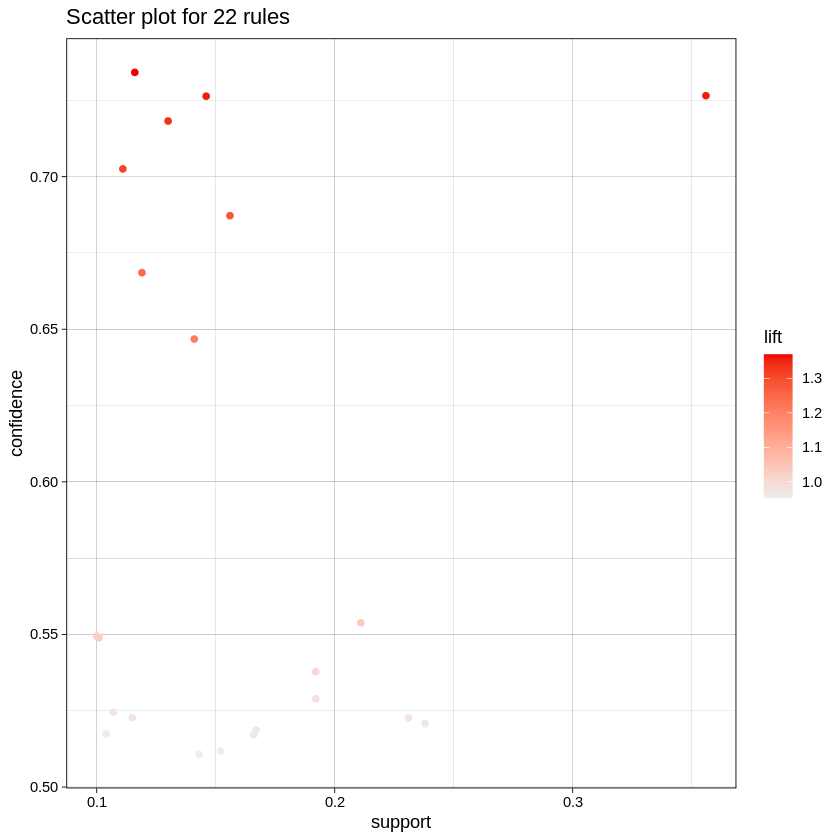

In [88]:
plot(Rule_cosmetic)


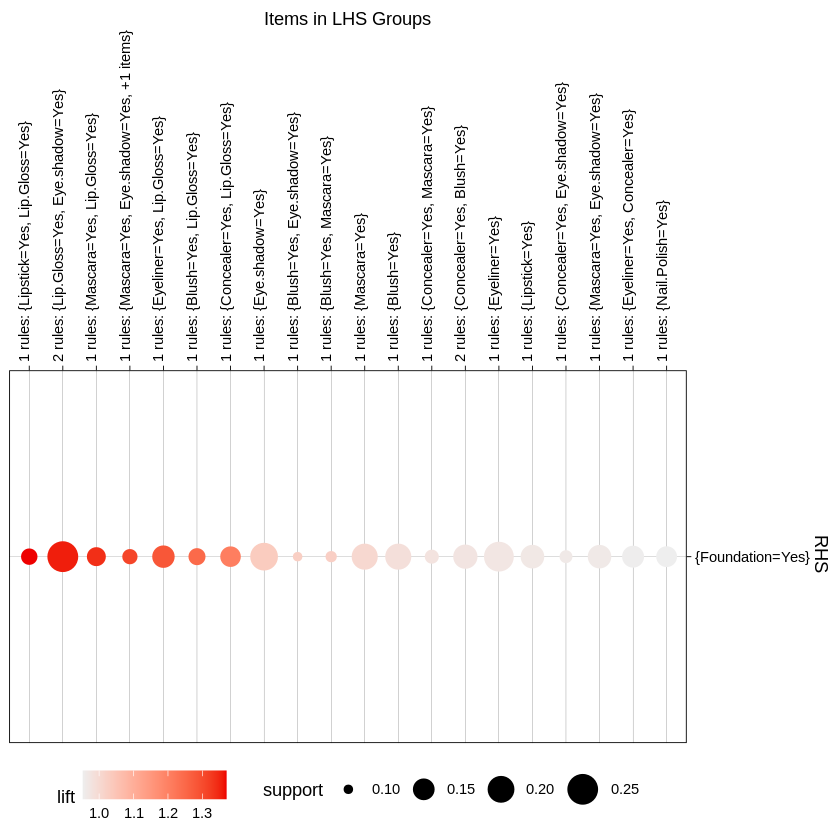

In [89]:
plot(Rule_cosmetic,"grouped")


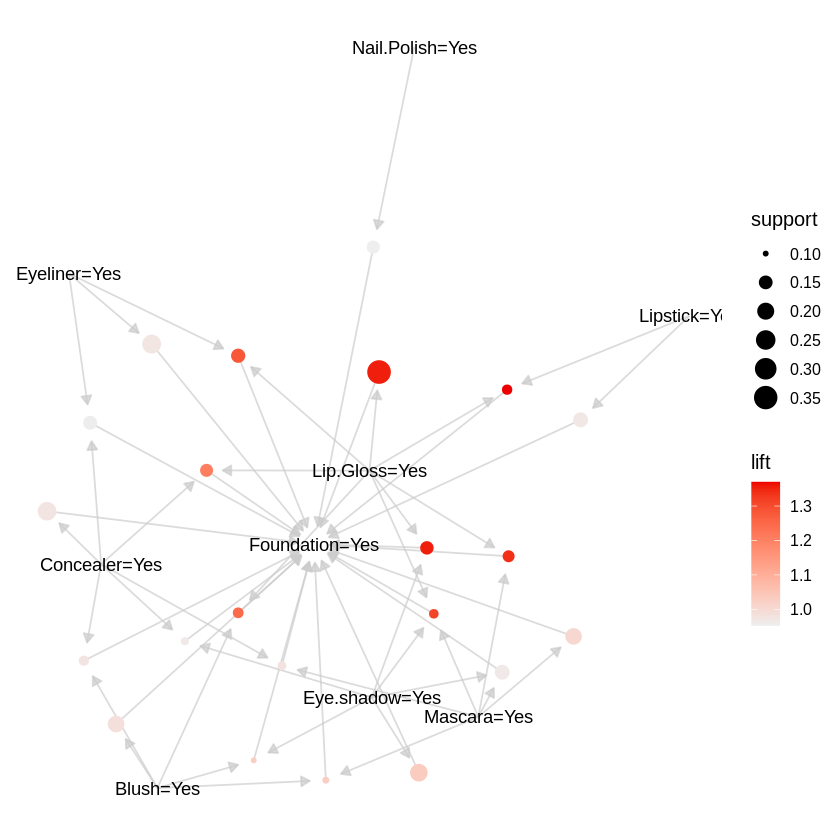

In [90]:
plot(Rule_cosmetic,"graph")